In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
sep_coins = cv2.imread('../Computer-Vision-with-Python/DATA/pennies.jpg')

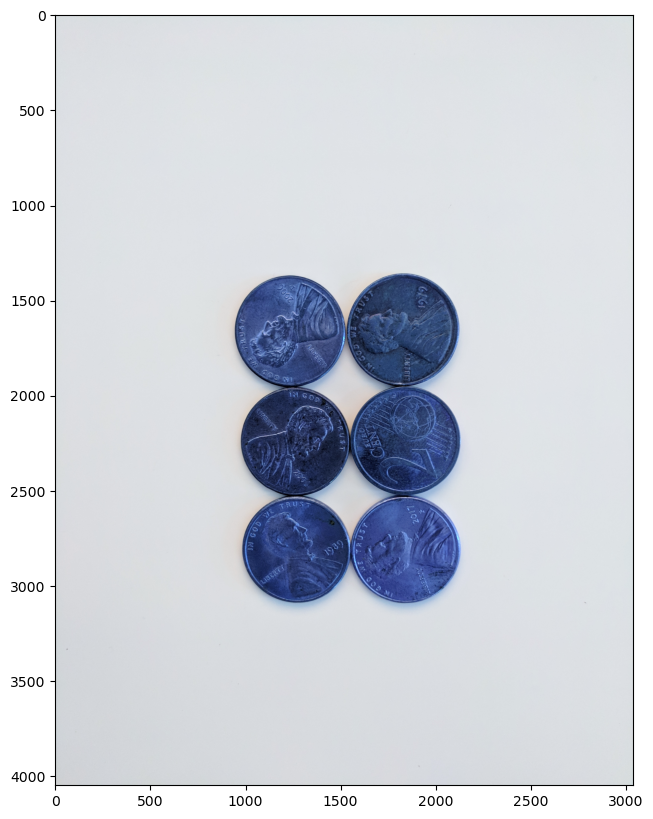

In [4]:
display(sep_coins)

In [5]:
# medium blur -> grayscale -> binary threshold -> find contours
sep_blur = cv2.medianBlur(sep_coins,25)

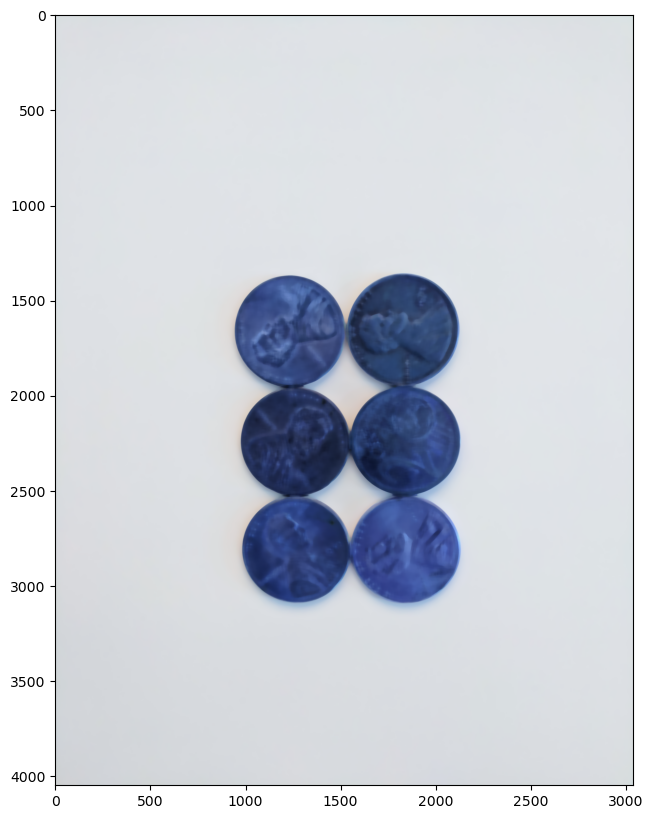

In [6]:
display(sep_blur)

In [7]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

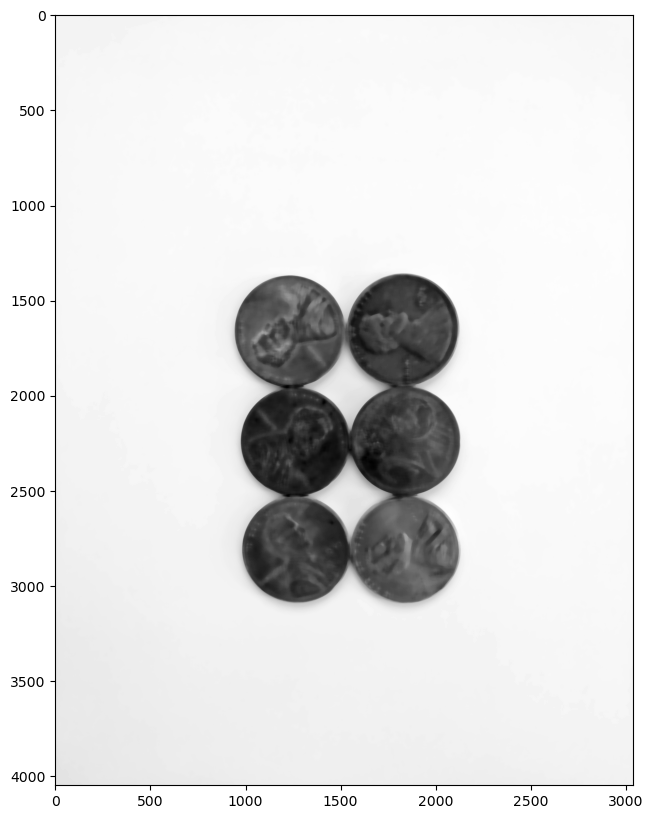

In [8]:
display(gray_sep_coins)

In [9]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

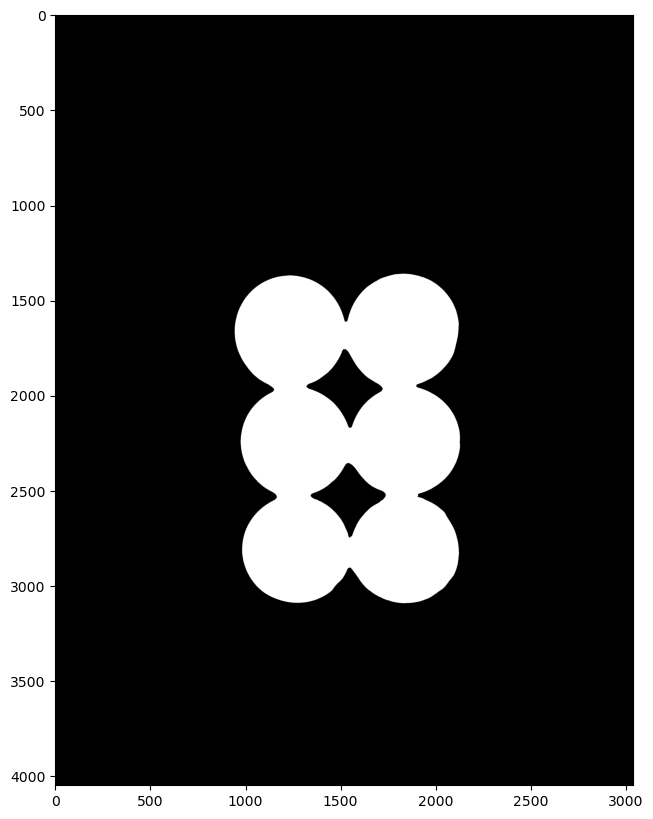

In [11]:
display(sep_thresh)

In [13]:
contours, heirarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [14]:
for i in range(len(contours)):
    if heirarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

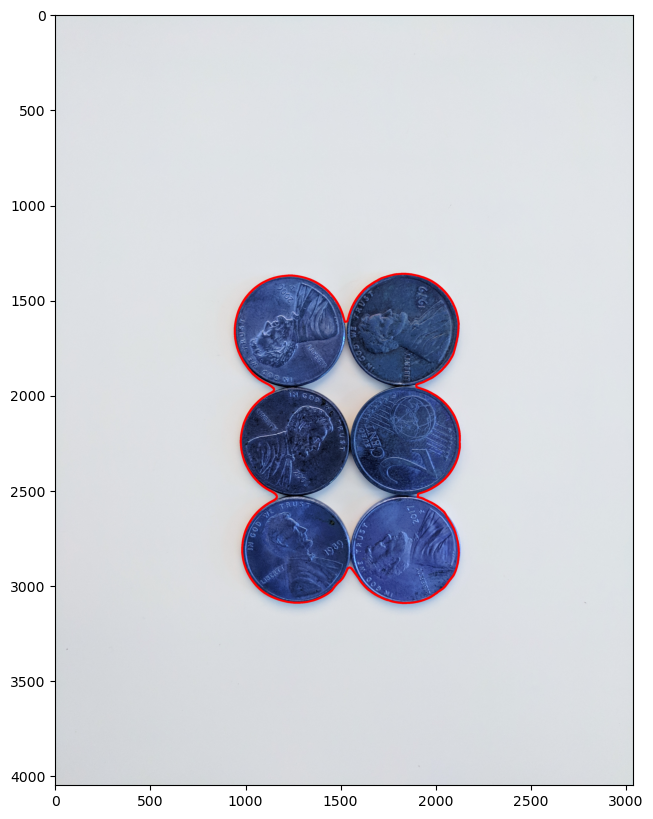

In [15]:
display(sep_coins)

In [16]:
img = cv2.imread('../Computer-Vision-with-Python/DATA/pennies.jpg')

In [17]:
img = cv2.medianBlur(img,35)

In [19]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [21]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

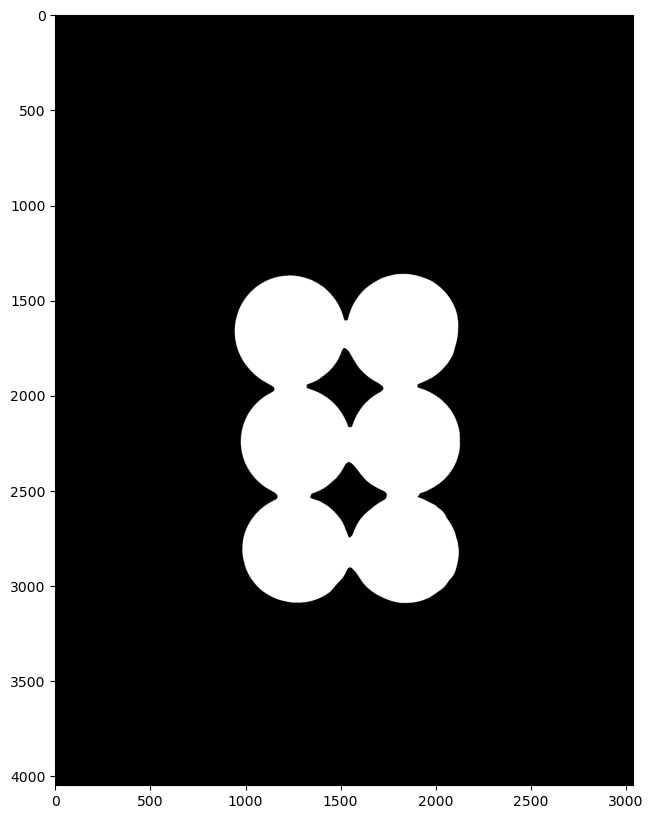

In [35]:
display(thresh)
sure_bg = cv2.dilate(opening,kernel,3)

In [23]:
# NOISE REMOVAL (OPTIONAL)
kernel = np.ones((3,3),np.uint8)

In [25]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

In [26]:
# DISTANCE TRANSFORM
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

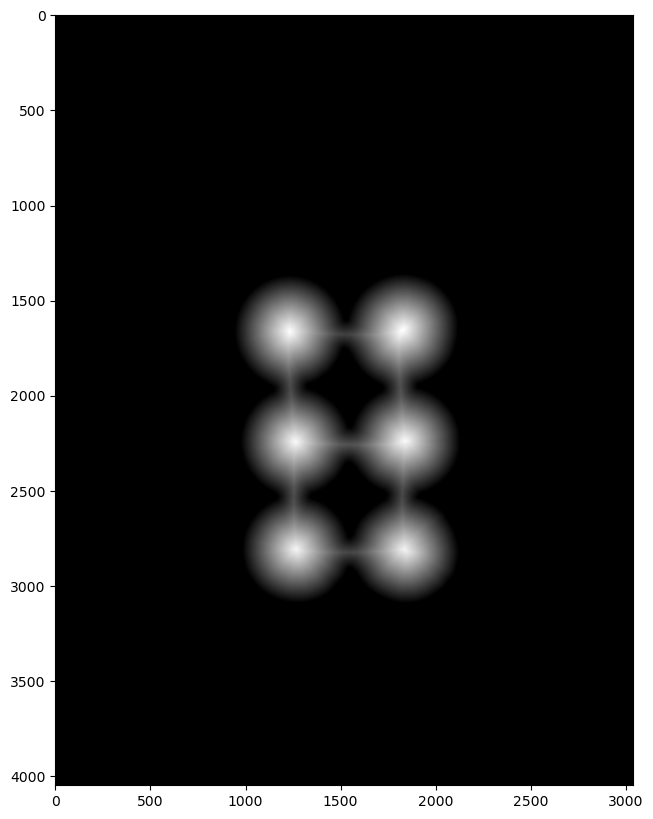

In [29]:
display(dist_transform)

In [30]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

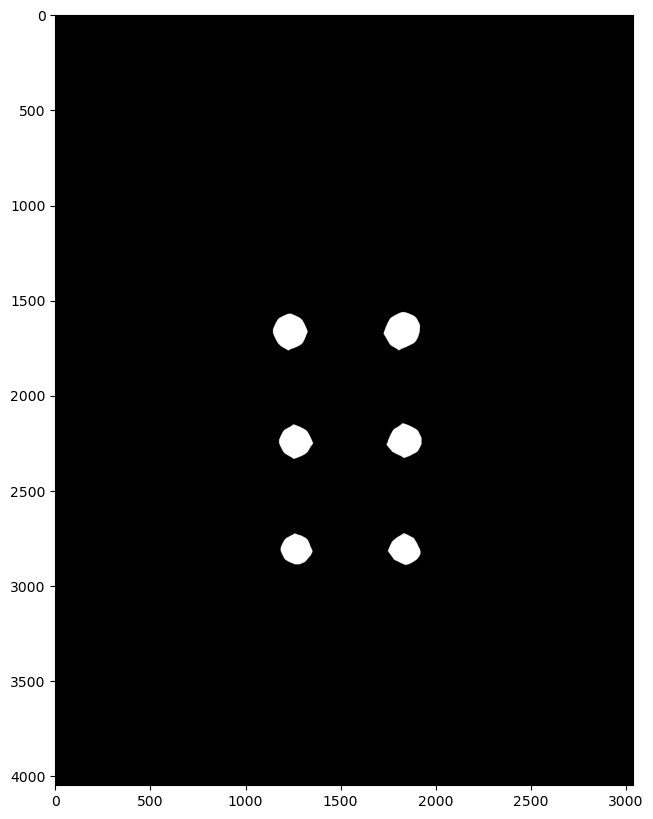

In [31]:
display(sure_fg)

In [32]:
sure_fg = np.uint8(sure_fg)

In [36]:
unknown = cv2.subtract(sure_bg,sure_fg)

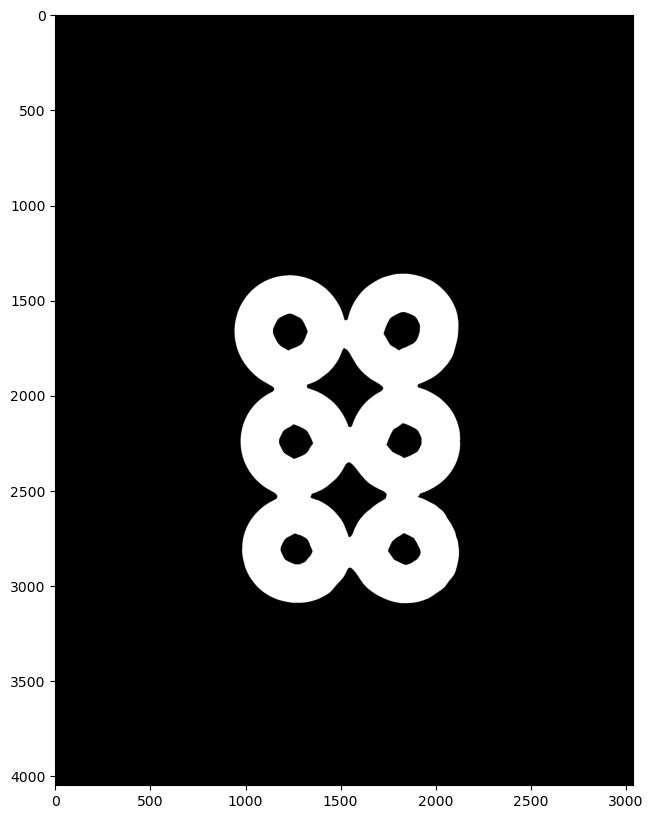

In [37]:
display(unknown)

In [38]:
# Create label markers
ret, markers = cv2.connectedComponents(sure_fg)

In [43]:
markers = markers+1

In [45]:
markers[unknown==255]=0

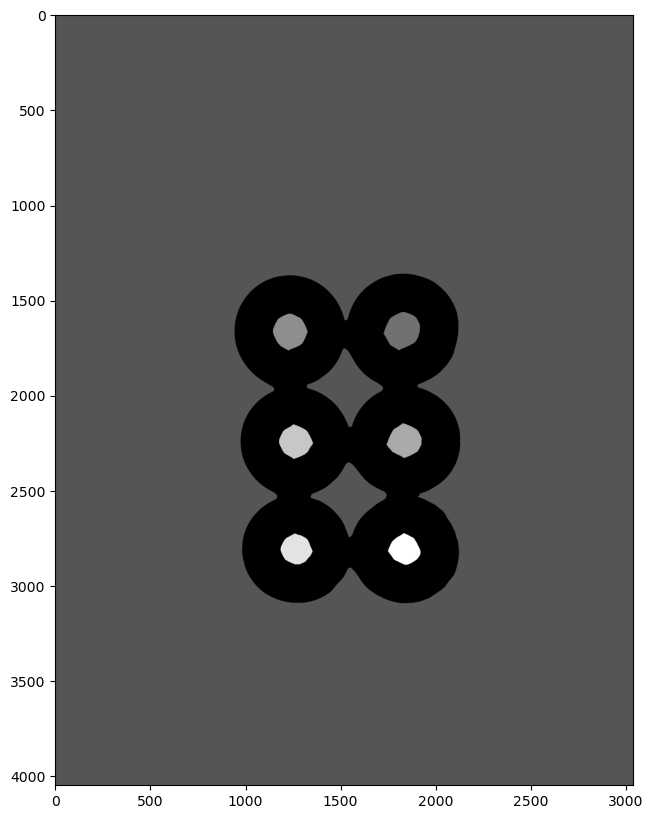

In [46]:
display(markers)

In [47]:
markers = cv2.watershed(img,markers)

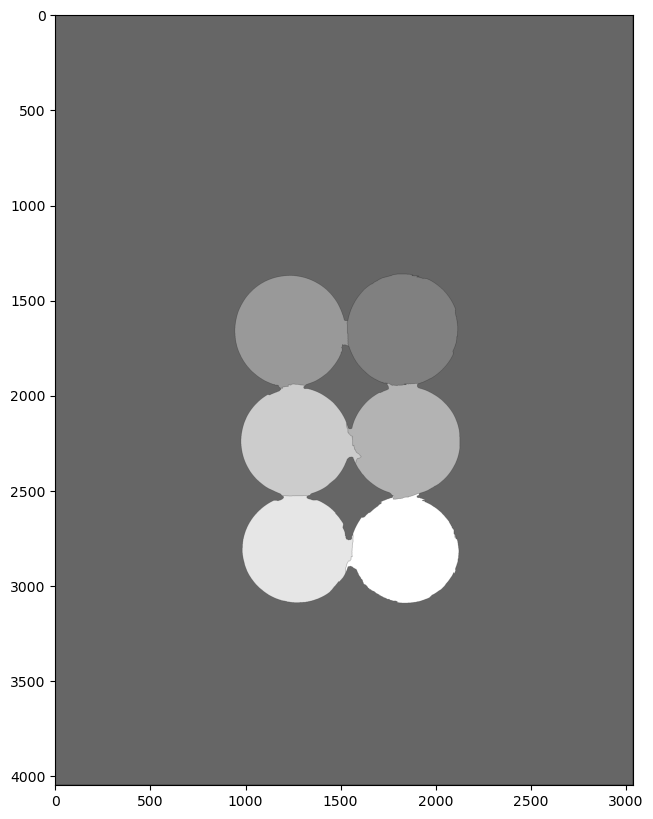

In [48]:
display(markers)

In [49]:
contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [57]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

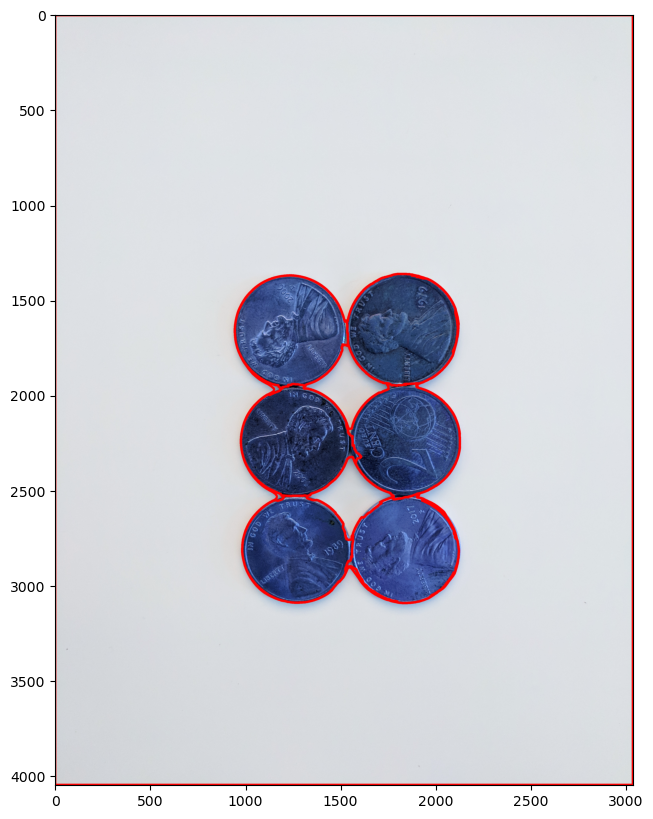

In [59]:
display(sep_coins)